In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db
import plotly as ply
import plotly.express as px
import plotly.graph_objects as go

In [94]:
df = pd.read_csv('sample_social_media_data.csv')

In [95]:
df.head()

,id,platform,username,post_date,content,likes,comments,shares
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   platform   3000 non-null   object
 2   username   3000 non-null   object
 3   post_date  3000 non-null   object
 4   content    3000 non-null   object
 5   likes      3000 non-null   int64 
 6   comments   3000 non-null   int64 
 7   shares     3000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


In [97]:
df['post_date'] = pd.to_datetime(df['post_date'])

In [98]:
df.describe()

,id,post_date,likes,comments,shares
count,3000.000000,3000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2023-06-02 07:35:57,154.732333,25.486000,15.338000
min,1.000000,2022-12-04 00:45:03,10.000000,1.000000,1.000000
25%,750.750000,2023-03-03 01:15:03,81.000000,13.000000,8.000000
50%,1500.500000,2023-06-05 13:45:03,155.000000,26.000000,15.000000
75%,2250.250000,2023-08-31 01:45:03,227.000000,38.000000,23.000000
max,3000.000000,2023-12-03 13:45:03,300.000000,50.000000,30.000000
std,866.169729,NaN,84.139546,14.503514,8.722487


### Frekuensi Jumlah Postingan

In [99]:
df['hour'] = df['post_date'].dt.hour

In [100]:
hourly_posting = df['hour'].value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17984\3860402163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_posting.index, y=hourly_posting.values, palette='viridis')


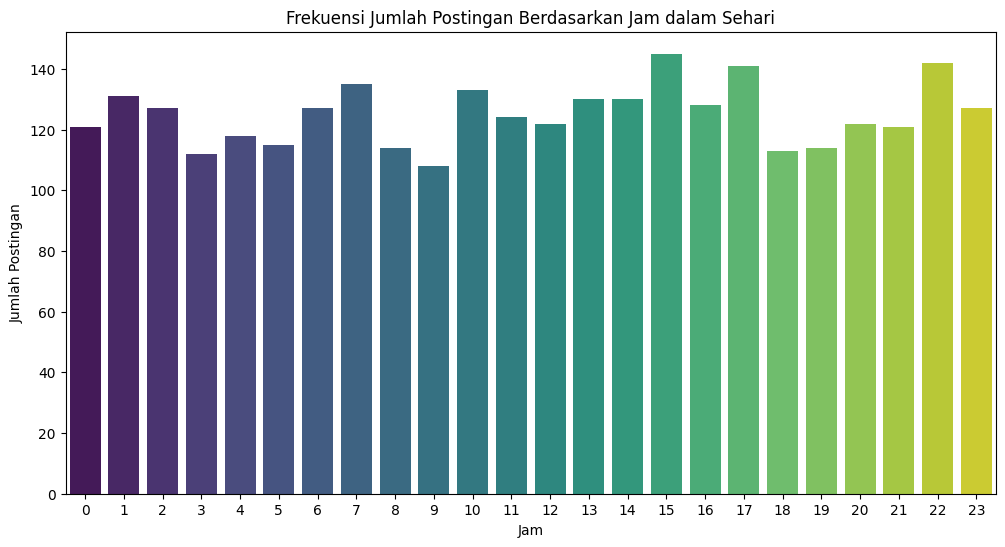

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_posting.index, y=hourly_posting.values, palette='viridis')
plt.xlabel('Jam')
plt.ylabel('Jumlah Postingan')
plt.title('Frekuensi Jumlah Postingan Berdasarkan Jam dalam Sehari')
plt.show()

### Korelasi Panjang Teks Postingan dan Jumlah Interaksi

In [102]:
df['total_interactions'] = df['likes'] + df['comments'] + df['shares']

In [103]:
df['content_length'] = df['content'].apply(len)

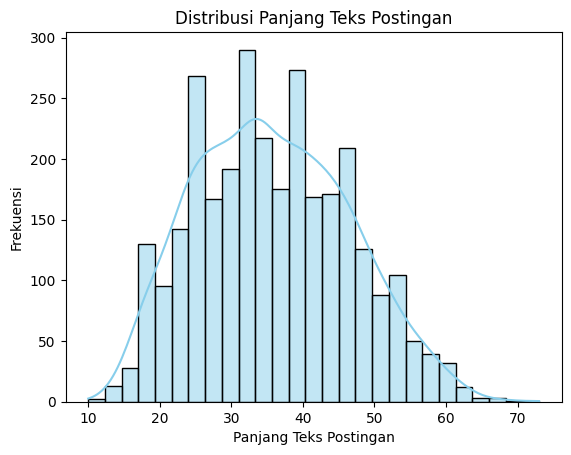

In [104]:
sns.histplot(df['content_length'], kde=True, color='skyblue')
plt.xlabel('Panjang Teks Postingan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks Postingan')
plt.show()

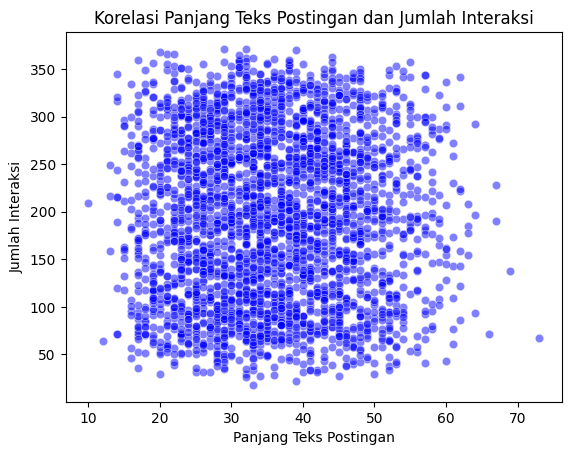

In [105]:
sns.scatterplot(x=df['content_length'], y=df['total_interactions'], alpha=0.5, color='blue')
plt.xlabel('Panjang Teks Postingan')
plt.ylabel('Jumlah Interaksi')
plt.title('Korelasi Panjang Teks Postingan dan Jumlah Interaksi')
plt.show()

Berdasarkan scatter plot yang menggambarkan hubungan antara panjang teks postingan dan jumlah interaksi, terlihat bahwa titik-titik tersebar secara acak tanpa pola yang jelas. Hal ini menunjukkan bahwa tidak ada korelasi signifikan antara panjang teks dengan jumlah interaksi yang mencakup likes, komentar, dan shares.

In [106]:
correlation_matrix = df[['content_length', 'likes', 'comments', 'shares']].corr()
correlation_matrix

,content_length,likes,comments,shares
content_length,1.000000,0.019506,-0.014865,-0.044832
likes,0.019506,1.000000,0.032371,-0.011050
comments,-0.014865,0.032371,1.000000,0.021303
shares,-0.044832,-0.011050,0.021303,1.000000


### Pengguna dengan Dampak Terbesar

In [107]:
total_interactions_by_user = df.groupby('username')['total_interactions'].sum()

In [108]:
top_user = total_interactions_by_user.idxmax()
top_user_interactions = total_interactions_by_user.max()
print("Pengguna dengan Dampak Terbesar:", top_user)
print("Total Interaksi:", top_user_interactions)

Pengguna dengan Dampak Terbesar: johnsonmichael
Total Interaksi: 838


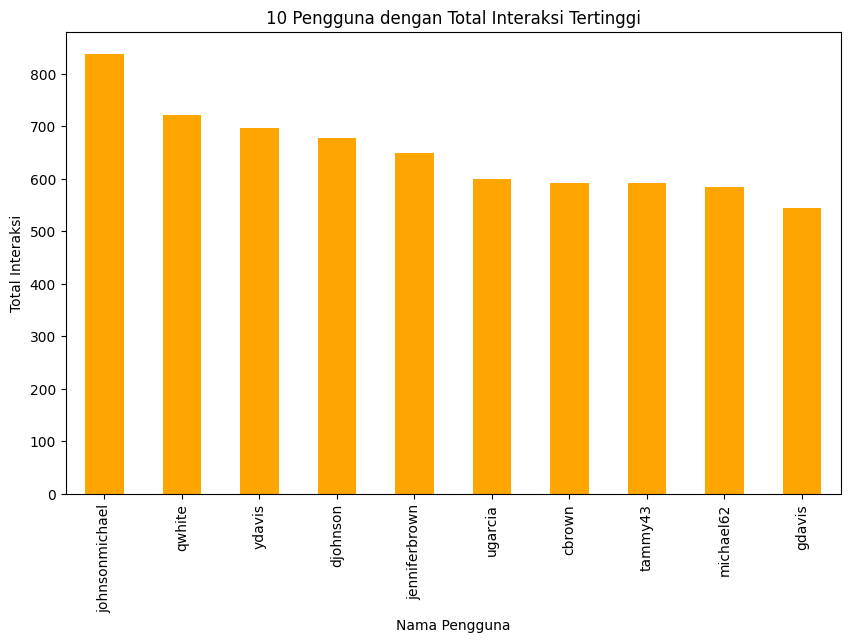

In [109]:
plt.figure(figsize=(10, 6))
total_interactions_by_user.nlargest(10).plot(kind='bar', color='orange')
plt.xlabel('Nama Pengguna')
plt.ylabel('Total Interaksi')
plt.title('10 Pengguna dengan Total Interaksi Tertinggi')
plt.show()

### Analisis Sentimen Postingan

In [110]:
#!pip install textblob

In [111]:
from textblob import TextBlob #Library untuk NLP

In [112]:
df['sentiment'] = df['content'].apply(lambda text: TextBlob(text).sentiment.polarity)

Polarisasi (polarity) adalah nilai numerik yang menunjukkan apakah teks memiliki sentimen positif, negatif, atau netral.

Nilai negatif (antara -1 dan 0): Menunjukkan bahwa teks memiliki sentimen negatif. Semakin mendekati -1, semakin kuat tingkat sentimen negatif.

Nilai nol (0): Menunjukkan bahwa teks bersifat netral atau tidak menunjukkan sentimen positif atau negatif yang jelas.

Nilai positif (antara 0 dan 1): Menunjukkan bahwa teks memiliki sentimen positif. Semakin mendekati 1, semakin kuat tingkat sentimen positif.

In [113]:
df['sentiment_category'] = df['sentiment'].apply(lambda polarity: 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral')

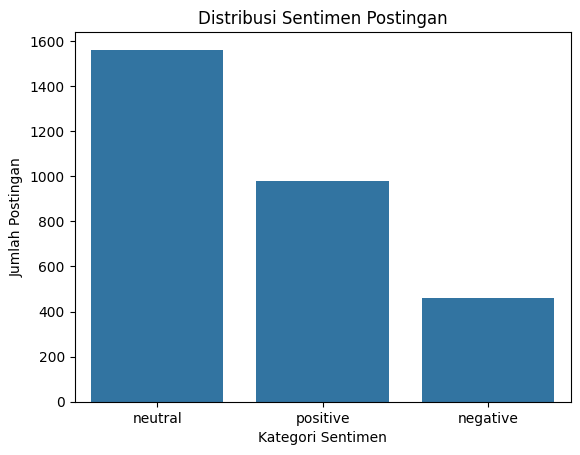

In [114]:
sns.countplot(data=df, x='sentiment_category')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Postingan')
plt.title('Distribusi Sentimen Postingan')
plt.show()

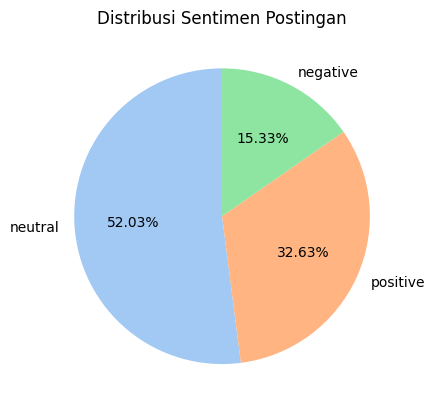

In [115]:
sentiment_distribution = df['sentiment_category'].value_counts()

plt.pie(
    sentiment_distribution,
    labels=sentiment_distribution.index,
    autopct='%.2f%%',
    colors=sns.color_palette('pastel'),
    startangle=90
)
plt.title('Distribusi Sentimen Postingan')
plt.show()

### Analisis Berdasarkan Platform

In [116]:
platform_counts = df['platform'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17984\1342279918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


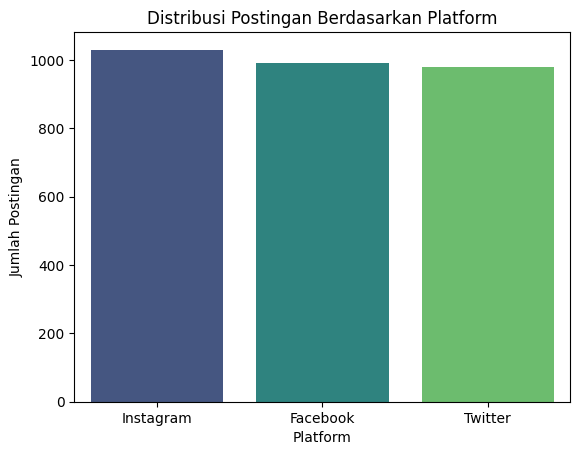

In [117]:
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.xlabel('Platform')
plt.ylabel('Jumlah Postingan')
plt.title('Distribusi Postingan Berdasarkan Platform')
plt.show()

In [118]:
avg_interactions_per_hour = df.groupby(['platform', 'hour'])['total_interactions'].mean().reset_index()

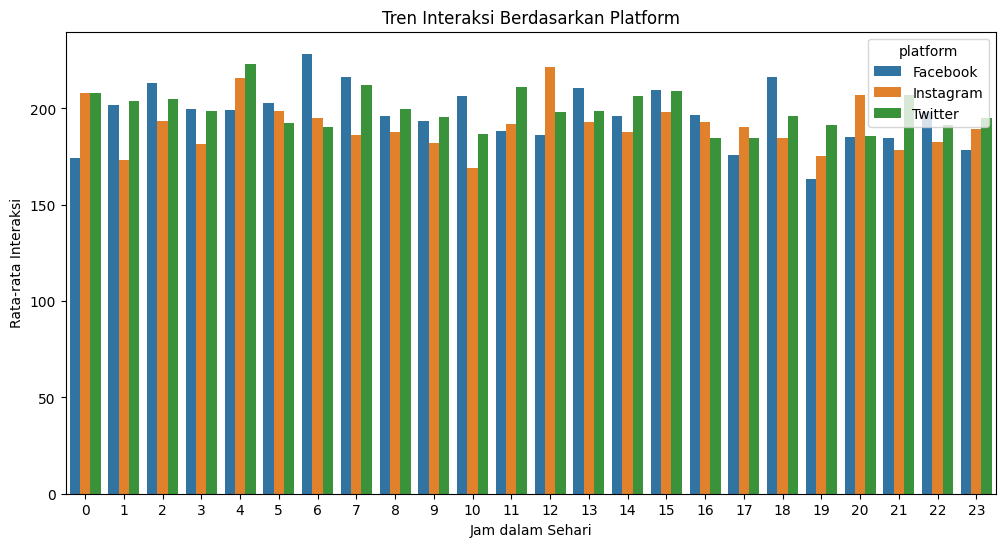

In [119]:
# visualisasi rata-rata interaksi berdasarkan jam dan platform
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_interactions_per_hour, x='hour', y='total_interactions', hue='platform')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Interaksi')
plt.title('Tren Interaksi Berdasarkan Platform')
plt.show()

In [120]:
df['hour_group'] = (df['hour'] // 4) * 4  # Membagi dengan 4 dan mengalikan untuk mendapatkan awal interval
df['hour_group_label'] = df['hour_group'].apply(lambda x: f"{x:02d}:00-{(x+3):02d}:59")  # Format label interval

In [121]:
avg_interactions_per_hour_group = df.groupby(['platform', 'hour_group_label'])['total_interactions'].mean().reset_index()

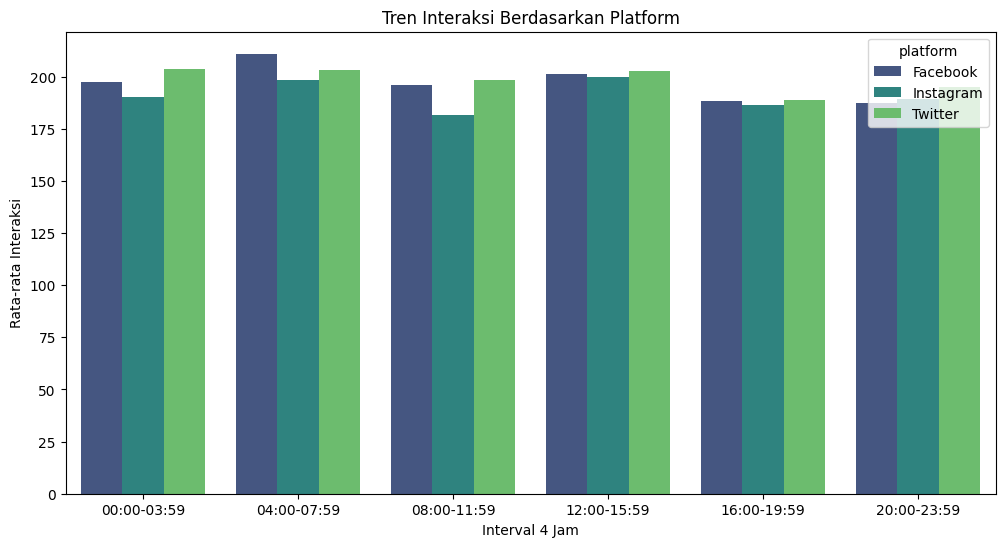

In [122]:
# visualisasi untuk rata-rata interaksi berdasarkan interval 4 jam dan platform
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_interactions_per_hour_group, x='hour_group_label', y='total_interactions', hue='platform', palette='viridis')
plt.xlabel('Interval 4 Jam')
plt.ylabel('Rata-rata Interaksi')
plt.title('Tren Interaksi Berdasarkan Platform')
plt.show()